<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/LinearModels/Example_Multinomial_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

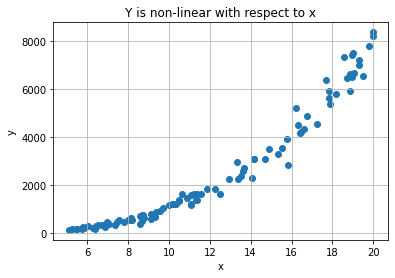

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a sample dataset
x = np.random.uniform(low=5, high=20, size=100)
e = np.random.normal(loc=0, scale=0.5, size=100)
y = (x + e)**3

fig, ax = plt.subplots(1,1)
ax.scatter(x,y)
ax.set_title('Y is non-linear with respect to x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
fig.show()


In [11]:
# build a ridge regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

x = x.reshape(x.shape[0],1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

rgr = Ridge()
rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)
mae = mean_absolute_error(y_test, y_test_pred)
print(f'MAE: {mae:.2f}')

MAE: 589.44


In [12]:
# transforming the target variable
class YTransformer:
  def __init__(self, power=1):
      self.power = power

  def fit(self, x, y):
    pass

  def transform(self, x, y):
    return x, np.power(y, self.power)

  def inverse_transform(self, x, y):
    return x, np.power(y, 1/self.power)
  
  def fit_transform(self, x, y):
    return self.transform(x, y)

In [13]:
from sklearn.metrics import r2_score

for power in [1, 1/2, 1/3, 1/4, 1/5]:
  yt = YTransformer(power)
  _, y_train_t = yt.fit_transform(None, y_train)
  _, y_test_t = yt.transform(None, y_test)
  rgs = Ridge()
  rgs.fit(x_train, y_train_t)
  y_pred_t = rgs.predict(x_test)
  _, y_pred = yt.inverse_transform(None, y_pred_t)
  print(
      'Transformed y^{:.2f}: MAE={:.0f}, R2={:.2f}'.format(
          power, mean_absolute_error(y_test, y_pred),
          r2_score(y_test, y_pred)
      )
  )

Transformed y^1.00: MAE=589, R2=0.90
Transformed y^0.50: MAE=172, R2=0.99
Transformed y^0.33: MAE=162, R2=0.99
Transformed y^0.25: MAE=181, R2=0.99
Transformed y^0.20: MAE=198, R2=0.98
